In [29]:
# Imports 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Displaing settings
sns.set_style("whitegrid")

# Loading dataset
df = pd.read_csv('laptop_price - dataset.csv')

# Inspecting the data
df.head()


,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


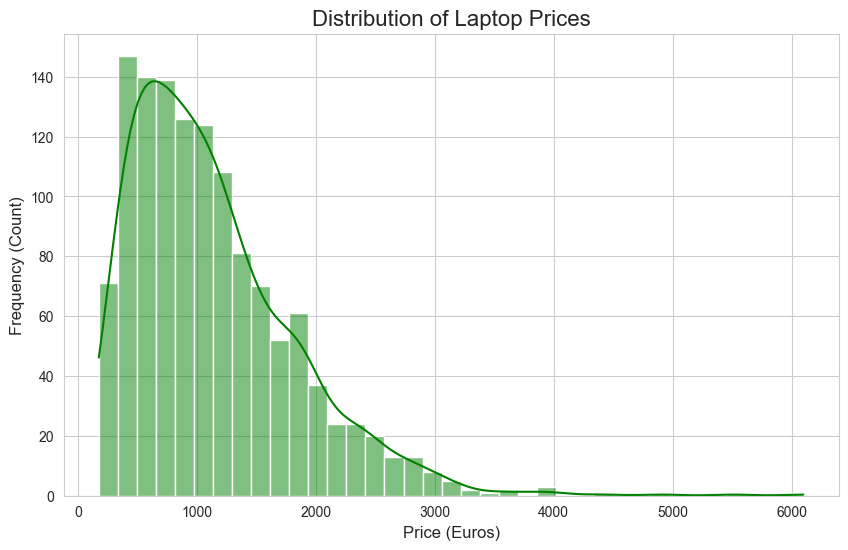

In [30]:
# creating a customized plot of the price of all laptops

plt.figure(figsize=(10, 6))
sns.histplot(df['Price (Euro)'], kde=True, color='green')
plt.title('Distribution of Laptop Prices', fontsize=16) 
plt.xlabel('Price (Euros)', fontsize=12) 
plt.ylabel('Frequency (Count)', fontsize=12) 
plt.show()

In [31]:
# calculating the average price for each company and sort from highest to lowest

avg_price_by_company = df.groupby('Company')['Price (Euro)'].mean().sort_values(ascending=False)

print("\nAverage Price per Company:")
print(avg_price_by_company)

most_expensive_company = avg_price_by_company.idxmax()
highest_avg_price = avg_price_by_company.max()

print(f"\nAnswer: The company with the highest average price is **{most_expensive_company}** ({highest_avg_price:.2f} Euros).")


Average Price per Company:
Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64

Answer: The company with the highest average price is **Razer** (3346.14 Euros).


Average Price per Company (sorted):
Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64


C:\Users\galir\AppData\Local\Temp\ipykernel_23924\185168726.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_company.index, y=avg_price_by_company.values, palette='pastel')


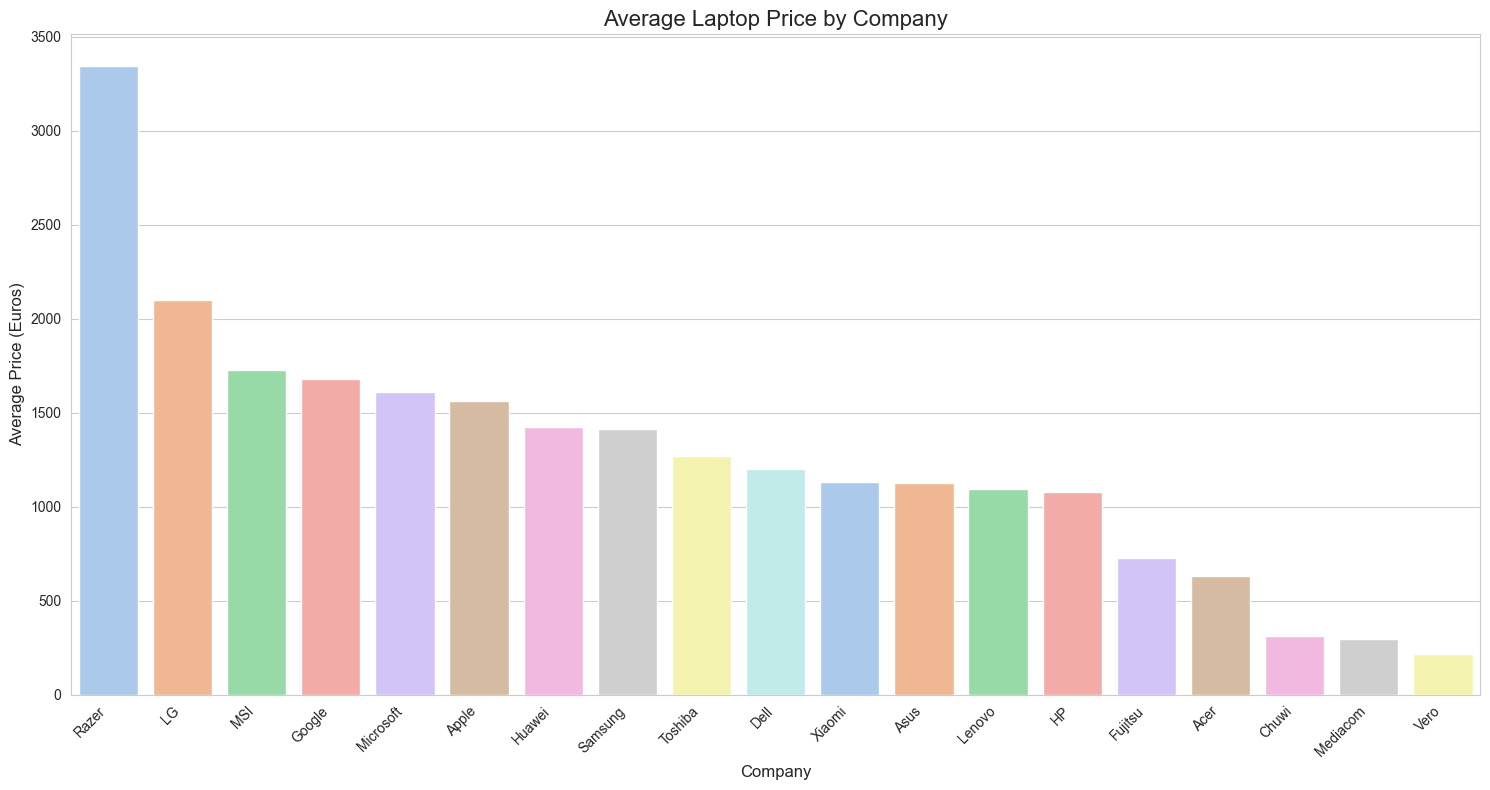


The company with the highest average price is: Razer (3346.14 Euros)


In [32]:
# calculating the average price for each company and sorting

avg_price_by_company = df.groupby('Company')['Price (Euro)'].mean().sort_values(ascending=False)


print("Average Price per Company (sorted):")
print(avg_price_by_company)

# cearting a customized plot

plt.figure(figsize=(15, 8))
sns.barplot(x=avg_price_by_company.index, y=avg_price_by_company.values, palette='pastel')


plt.xticks(rotation=45, ha='right') 
plt.title('Average Laptop Price by Company', fontsize=16)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Average Price (Euros)', fontsize=12)

plt.tight_layout() 
plt.show()

# identifing the most expensive company

most_expensive = avg_price_by_company.idxmax()
price = avg_price_by_company.max()
print(f"\nThe company with the highest average price is: {most_expensive} ({price:.2f} Euros)")

In [33]:
# fixing different types of Operating systems present in the data under the column name "OpSys".

print(f"\nUnique OS before cleaning: {df['OpSys'].unique()}")

# deffinding a cleaning function 
def clean_os(os_name):
    if 'Windows' in os_name:
        return 'Windows'
    elif 'Mac' in os_name or 'mac' in os_name:
        return 'macOS'
    elif 'Linux' in os_name:
        return 'Linux'
    elif 'No OS' in os_name or 'Android' in os_name or 'Chrome' in os_name:
        return 'Other/No OS'
    return os_name


df['OpSys'] = df['OpSys'].apply(clean_os)

print(f"Unique OS after cleaning: {df['OpSys'].unique()}")



Unique OS before cleaning: ['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']
Unique OS after cleaning: ['macOS' 'Other/No OS' 'Windows' 'Linux']


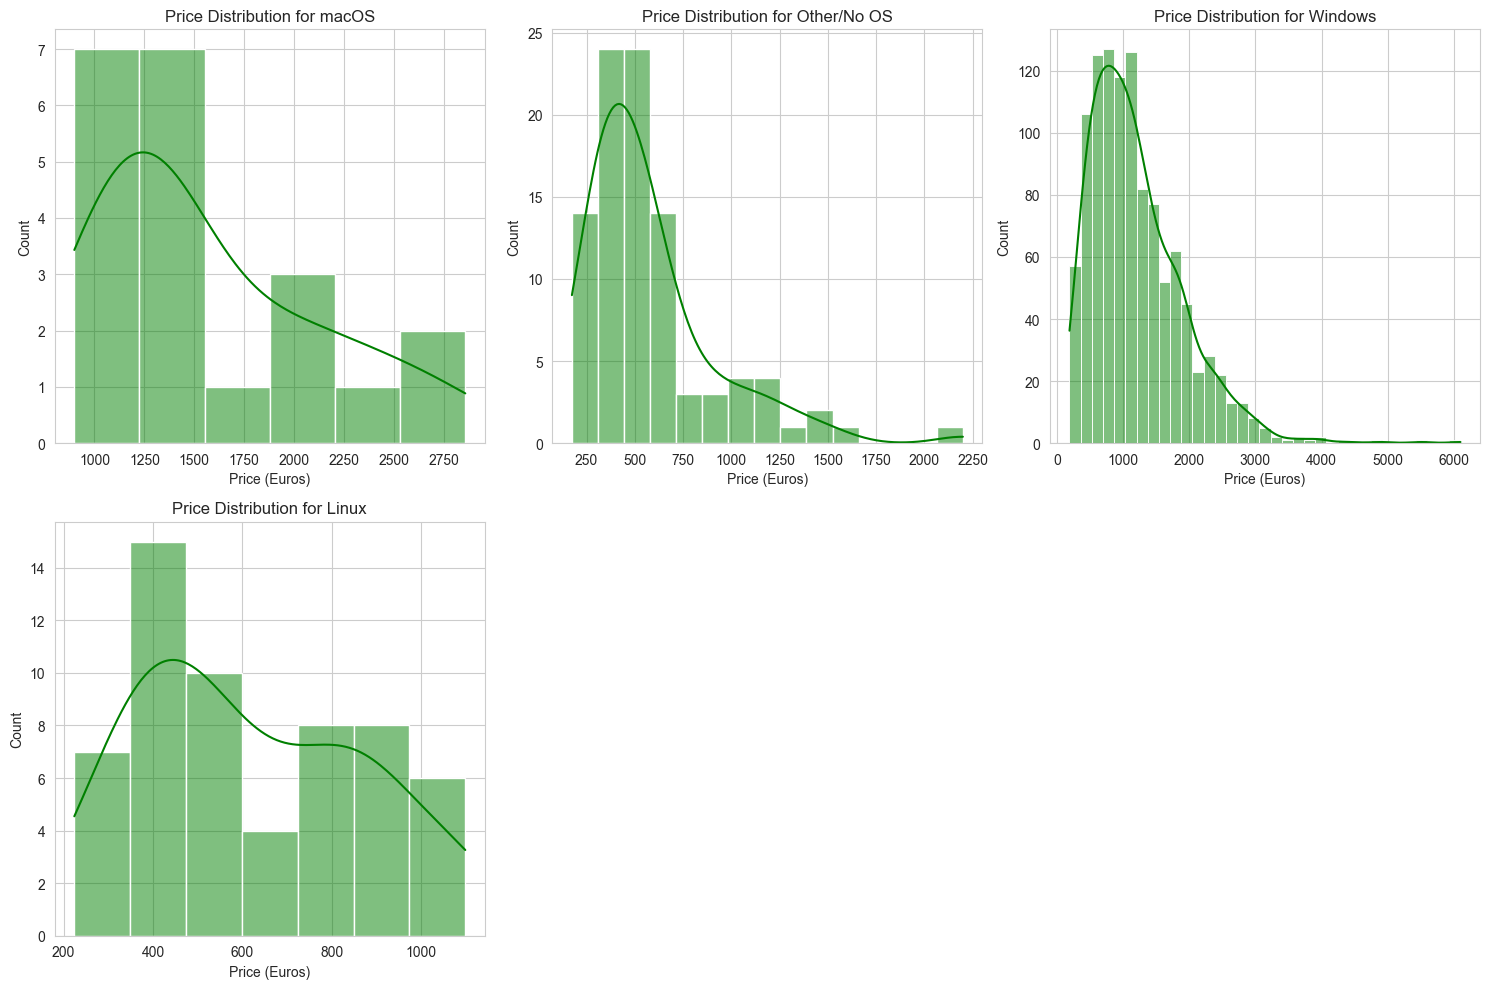

In [34]:

# creat a list of all unique operating systems found in the dataset

unique_os = df['OpSys'].unique()

# creating 4 plots for each operating systems 

plt.figure(figsize=(15, 10))

for i, os in enumerate(unique_os, 1):
    plt.subplot(2, 3, i) 
    subset = df[df['OpSys'] == os]
    sns.histplot(subset['Price (Euro)'], kde=True, color='green')
    plt.title(f'Price Distribution for {os}') 
    plt.xlabel('Price (Euros)')
    plt.ylabel('Count') 

plt.tight_layout()
plt.show()

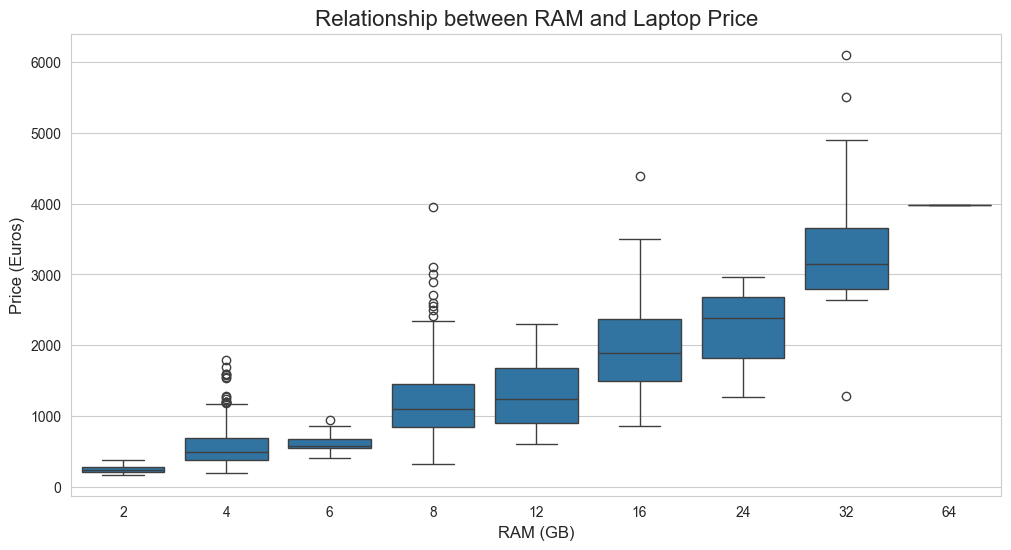


--- Outlier Analysis ---
Lower Bound: -722.25, Upper Bound: 2827.75
Number of outliers detected: 28
Example outliers:


,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
17,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.9,16,512GB SSD,AMD,Radeon Pro 560,macOS,1.83,2858.0
196,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel,Core i7 7820HK,2.9,32,1TB SSD,Nvidia,GeForce GTX 1080,Windows,3.49,6099.0
204,Dell,Precision 7520,Workstation,15.6,4K Ultra HD 3840x2160,Intel,Xeon E3-1505M V6,3.0,16,256GB SSD + 1TB HDD,Nvidia,Quadro M1200,Windows,2.80,3055.0
238,Asus,ROG G703VI-E5062T,Gaming,17.3,Full HD 1920x1080,Intel,Core i7 7820HK,2.9,32,512GB SSD + 1TB HDD,Nvidia,GeForce GTX 1080,Windows,4.70,3890.0
247,Asus,Rog G701VIK-BA060T,Gaming,17.3,Full HD 1920x1080,Intel,Core i7 7820HK,2.9,16,256GB SSD,Nvidia,GeForce GTX 1080,Windows,3.60,2999.0


In [35]:
# the relationship between RAM and laptop price

# creating the plot

plt.figure(figsize=(12, 6))
sns.boxplot(x='RAM (GB)', y='Price (Euro)', data=df)
plt.title('Relationship between RAM and Laptop Price', fontsize=16)
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('Price (Euros)', fontsize=12) 
plt.show()
 
# calculating and defining the statistical quartiles
 
Q1 = df['Price (Euro)'].quantile(0.25)
Q3 = df['Price (Euro)'].quantile(0.75)
IQR = Q3 - Q1

# define the lower and upper bounds, data points outside these bounds are considered statistical outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# filter the DataFrame to keep only the rows where the price is extreme

outliers = df[(df['Price (Euro)'] < lower_bound) | (df['Price (Euro)'] > upper_bound)]

print("\n--- Outlier Analysis ---")
print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
print(f"Number of outliers detected: {len(outliers)}")
print("Example outliers:")
display(outliers.head())



In [36]:
# creating a new column for the dataframe called "Storage type" that extracts the storage type from the column "Memory".

# deffinding the storage type function 
def extract_storage_type(memory_str):
    
    storage_types = []
    if 'SSD' in memory_str:
        storage_types.append('SSD')
    if 'HDD' in memory_str:
        storage_types.append('HDD')
    if 'Flash Storage' in memory_str:
        storage_types.append('Flash Storage')
    if 'Hybrid' in memory_str:
        storage_types.append('Hybrid')
    
    if not storage_types:
        return 'Unknown'
    return "+".join(storage_types)


df['Storage type'] = df['Memory'].apply(extract_storage_type)

print("\nNew 'Storage type' column created. First 5 rows:")
display(df[['Memory', 'Storage type']].head())


New 'Storage type' column created. First 5 rows:


,Memory,Storage type
0,128GB SSD,SSD
1,128GB Flash Storage,Flash Storage
2,256GB SSD,SSD
3,512GB SSD,SSD
4,256GB SSD,SSD
